# Datas Normais - date() - timedelta() - .year...

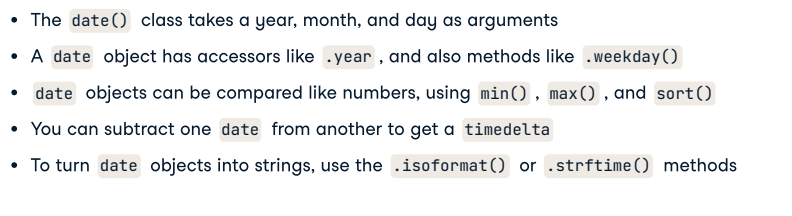

## .date()

<p> Criando Datas com <b>.date</b> </p>

In [2]:
from datetime import date
datas = [ date(2016, 10, 7), date(2017, 6, 21) ]

## .year - .month - .day ... etc
<p> Podemos ver o ano com <b>datas[0].year</b>, o mês com <b>datas[0].month</b>, o dia com <b>datas[0].day</b> O dia da semana com <b>datas[0].weekday()</b>.</p> 

In [79]:
# Exemplo
datas[0].year 

2016

## .timedelta()
<p> Podemos efetuar cálculos subtraindo as datas como <b>datas[1] - datas[0]</b>, caso queiramos subtrair uma quantidade de meses ou dias especificos, usaremos o <b>timedelta()</b>.</p>

In [3]:
from datetime import timedelta
td = timedelta(days=29,weeks=20)
datas[0]+td

datetime.date(2017, 3, 25)

# Datas Com Horas  - strftime() - .datetime() - .fromtimestamp()

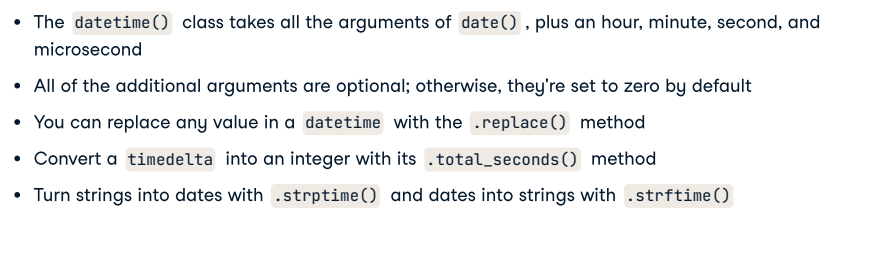

## .datetime()
<p>Criando Data Com Horas</p>


In [1]:
from datetime import datetime
dt = datetime(2022,11,1,2,34,0,0) #Y-M-D-H-M-S-MS

In [2]:
dt

datetime.datetime(2022, 11, 1, 2, 34)

<p>Também podemos utilizar da maneira seguinte:<b> dt = datetime(year=... month=... day=... hour=... minute=... second=... microsecond=...) </b></p>

## .strftime()
<p> Podemos checar ano, mês e outros atributos com <b>%Y, %m, %M, %d, %s, %ms</b>. junto ao <b>strftime().</b></p>

In [3]:
dt.strftime('%Y/%m/%d') 

'2022/11/01'

## .fromtimestamp()
<p> Podemos converter tempos em timestamp em horas dias e anos. </p>

In [42]:
ts = 6666666666
print(datetime.fromtimestamp(ts))

2181-04-04 08:51:06


# Timezones - timezone() - tz.gettz() - .astimezone() - .replace() 
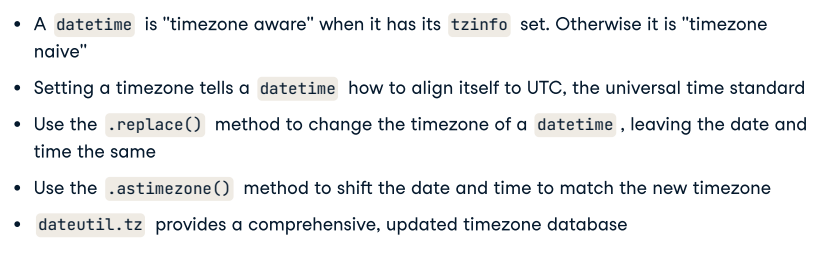

In [92]:
data = datetime(2021,12,4,0,0,2) # data para ser usado 

## timezone()
<p> Com timezone() podemos definir nossa timezone com timedelta(). utilizando ele dentro do nosso datetime, aplicando ele com astimezone ou utilizando replace.</p>


In [88]:
from datetime import timezone
tz = timezone(timedelta(hours=-5))

### timezone com tzinfo()
<p> O tzinfo deve ser configurado na criação do datetime. </p>

In [95]:
data_com_tz = datetime(2021,12,4,0,0,2, tzinfo = tz)
print(data_com_tz)

2021-12-04 00:00:02-05:00


### timezone com .astimezone()
<p> o astimezone já soma o horario. </p>

In [98]:
data_com_ast = data.astimezone(tz.utc) 
print(data_com_ast)

2021-12-04 03:00:02+00:00


### timezone com .replace()
<p> O replace funciona como tzinfo, porém acontece depois do datetime já criado. </p>

In [99]:
data_com_rpl = data.replace(tzinfo=tz.utc)
print(data_com_rpl)

2021-12-04 00:00:02+00:00


## com tz
<p> tz.gettz() com tz.gettz() podemos importar nossas timezones </p> 

In [102]:
from dateutil import tz
nw = tz.gettz('America/New_York')

2021-12-03 22:00:02-05:00


# Datas Com Pandas - parse_dates - .to_datetime() - .dt - .tz_localize()
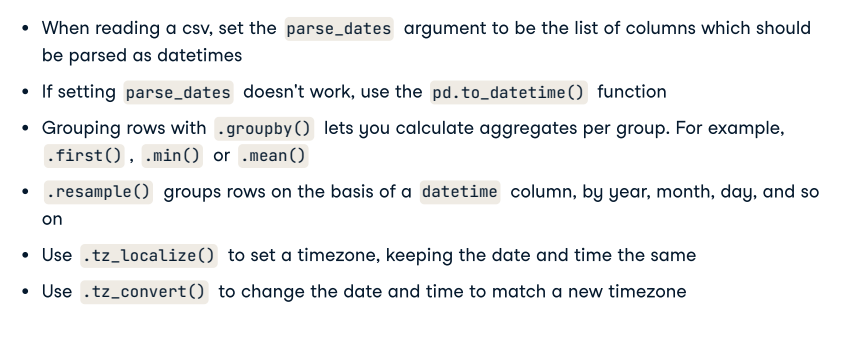

<p> Podemos transformar nossos dados de duas maneira com <b>to_datetime</b> ou <b>parse_dates</b>
    
```python 
df = pd.read_csv(parse_dates = ['data'])

df['data'] = pd.to_datetime(df['data'], format = 'Y%-m%-%d %H:%M:%S')
```

## Criando data

In [106]:
import pandas as pd
dicio = {'data':['26-07-1999','09-02-1999','27-06-1955','05-03-1988'],
        'nome':['lipe','t&ais','mãe','leo']}
df = pd.DataFrame(dicio)
df['data'] = pd.to_datetime(df['data'],format='%d-%m-%Y')
df

,data,nome
0,1999-07-26,lipe
1,1999-02-09,t&ais
2,1955-06-27,mãe
3,1988-03-05,leo


## Manipulando dados .dt
<p> <b>.weekofyear - .total_seconds() </b></p>

In [107]:
df['data'].dt.weekofyear

<ipython-input-107-8064730ead46>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['data'].dt.weekofyear


0    30
1     6
2    26
3     9
Name: data, dtype: int64

## .tz_localize()

<p> Localiza um timezone dentro da coluna do Dataframe </p>

```python 
df['data'].dt.tz_localize(timezone, ambiguous = 'NaT' )
```

# CAT
<p> Se tivermos Data separado do tempo. Podemos usar o cat para concatenar Data e Tempo</p>

```python
df['data_e_tempo'] = df['data'].str.cat(df['tempo'],sep=' ')
```